## Importing Data

In [1]:
path = #your dir path

In [134]:
import pandas as pd
import numpy as np
import os
import random
import matplotlib.pyplot as plt

In [139]:
def preprocess(path):
    file_names = os.listdir(path)
    male_files = file_names[0::2]
    female_files = file_names[1::2]
    audio_files = []
    for i in male_files:
        [audio_files.append([os.path.join(i,file), 'happy', 'male']) for file in os.listdir(os.path.join(path, i)) if file.startswith("03-01-03")]
        [audio_files.append([os.path.join(i,file), 'sad', 'male']) for file in os.listdir(os.path.join(path, i)) if file.startswith("03-01-04")]
    for i in female_files:
        [audio_files.append([os.path.join(i,file), 'happy', 'female']) for file in os.listdir(os.path.join(path, i)) if file.startswith("03-01-03")]
        [audio_files.append([os.path.join(i,file), 'sad', 'female']) for file in os.listdir(os.path.join(path, i)) if file.startswith("03-01-04")]
    return audio_files

In [140]:
audio_files = preprocess(path)
print('audio_files shape: ',np.shape(audio_files))

audio_files shape:  (384, 3)


In [141]:
audio_files = pd.DataFrame(audio_files)
audio_files = audio_files.sample(frac=1).reset_index(drop=True)
audio_files.columns = ['Audio Path', 'Emotion', 'Gender']
audio_files.head()

,Audio Path,Emotion,Gender
0,Actor_04\03-01-04-01-01-02-04.wav,sad,female
1,Actor_15\03-01-04-01-01-01-15.wav,sad,male
2,Actor_14\03-01-03-02-01-01-14.wav,happy,female
3,Actor_10\03-01-04-01-01-01-10.wav,sad,female
4,Actor_08\03-01-03-01-01-02-08.wav,happy,female


In [88]:
audio_files.nunique()

Audio Path    384
Emotion         2
Gender          2
dtype: int64

## Task 1
Select 3 or 4 audio files of happy and sad, generate following plots and explain the inferences in 1-2 lines,<br>
a. Waveform<br>
b. Spectrogram on log<br>
c. Zero Crossing rates<br>
d. Spectral Centroids<br>
e. Spectral Bandwidth<br>
f. MFCC

In [142]:
happy = audio_files[audio_files['Emotion']=='happy'][:3].reset_index(drop=True)
sad = audio_files[audio_files['Emotion']=='sad'][:3].reset_index(drop=True)

In [249]:
happy

,Audio Path,Emotion,Gender
0,Actor_14\03-01-03-02-01-01-14.wav,happy,female
1,Actor_08\03-01-03-01-01-02-08.wav,happy,female
2,Actor_06\03-01-03-02-02-01-06.wav,happy,female


In [250]:
sad

,Audio Path,Emotion,Gender
0,Actor_04\03-01-04-01-01-02-04.wav,sad,female
1,Actor_15\03-01-04-01-01-01-15.wav,sad,male
2,Actor_10\03-01-04-01-01-01-10.wav,sad,female


### Waveform

In [ ]:
import librosa
import librosa.display

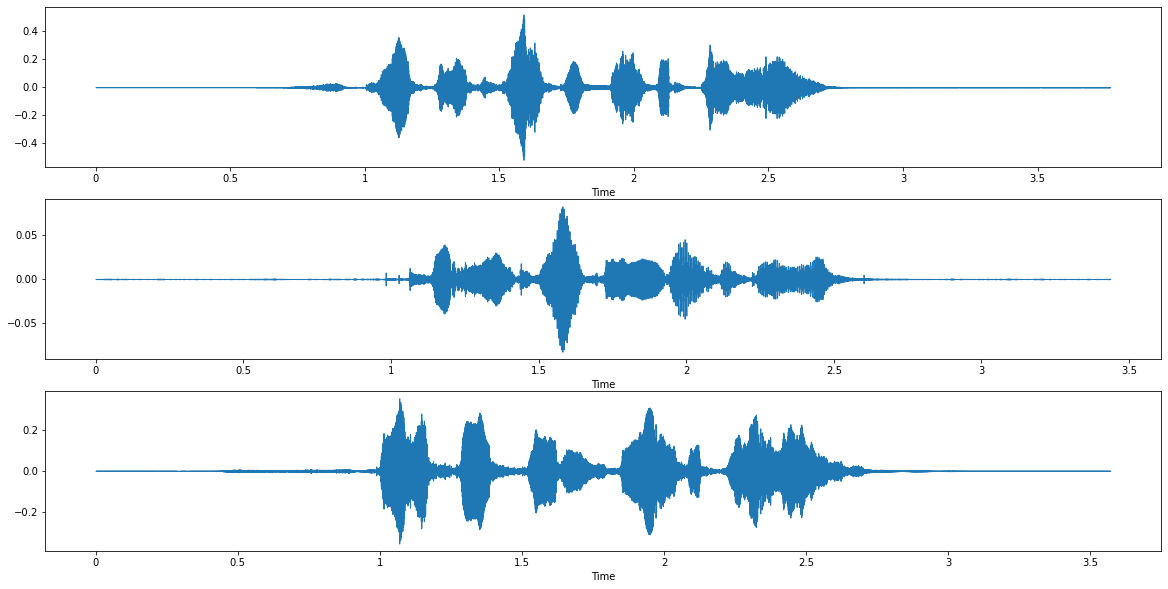

In [150]:
fig, axs = plt.subplots(3, figsize=(20,10))
for i in range(len(happy)):
    x , sr = librosa.load(os.path.join(path, happy['Audio Path'][i]))
    librosa.display.waveshow(x, sr=sr, ax=axs[i])

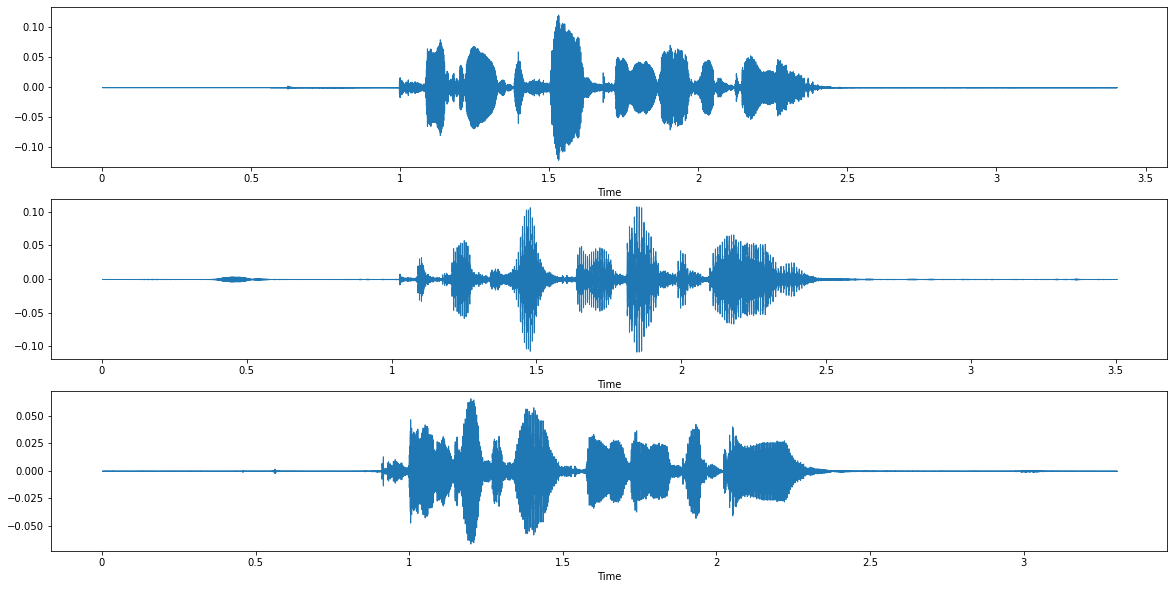

In [151]:
fig, axs = plt.subplots(3, figsize=(20,10))
for i in range(len(sad)):
    x , sr = librosa.load(os.path.join(path, sad['Audio Path'][i]))
    librosa.display.waveshow(x, sr=sr, ax=axs[i])

Amplitude of happy emotion are relatively higher than sad emotion which alligns with the fact that haapy people tend to speak more confidentally as compared to sad people who try to suppress their voice.

### Spectrogram on log

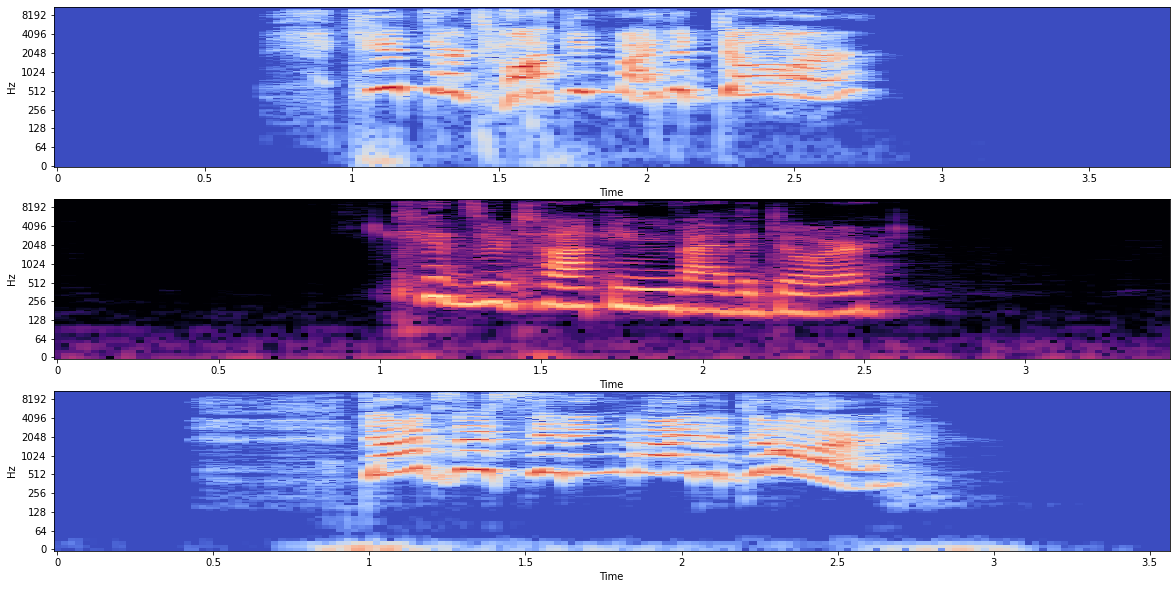

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

In [162]:
fig, axs = plt.subplots(3, figsize=(20,10))
for i in range(len(happy)):
    plt.figure(figsize=(20,4))
    plt.tight_layout()
    x , sr = librosa.load(os.path.join(path, happy['Audio Path'][i]))
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log',ax=axs[i])

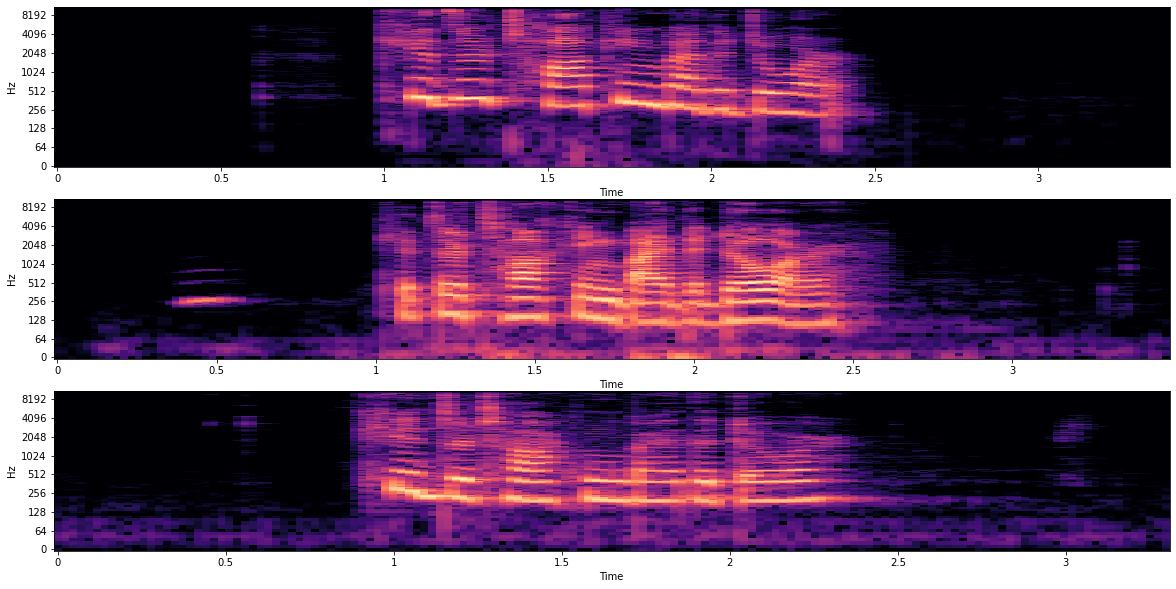

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

In [163]:
fig, axs = plt.subplots(3, figsize=(20,10))
for i in range(len(sad)):
    plt.figure(figsize=(20,4))
    plt.tight_layout()
    x , sr = librosa.load(os.path.join(path, sad['Audio Path'][i]))
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log',ax=axs[i])

Features for sad emotion looks a little more significant which means the words are more accurately recognisable in sad emotion

### Zero Crossing rates

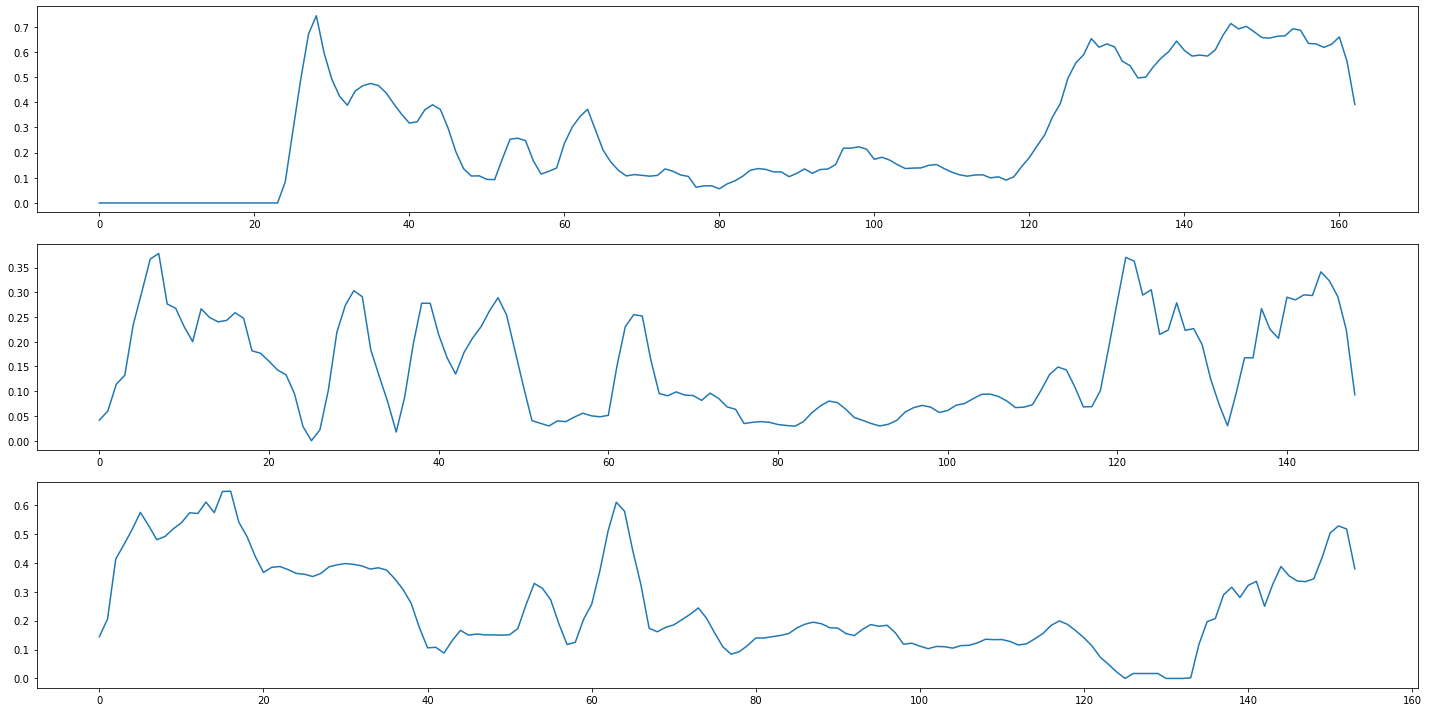

In [167]:
fig, axs = plt.subplots(3, figsize=(20,10))
for i in range(len(happy)):
    plt.tight_layout()
    x , sr = librosa.load(os.path.join(path, happy['Audio Path'][i]))
    zero_crossings = librosa.zero_crossings(x)
    zcrs = librosa.feature.zero_crossing_rate(x)
    axs[i].plot(zcrs[0])

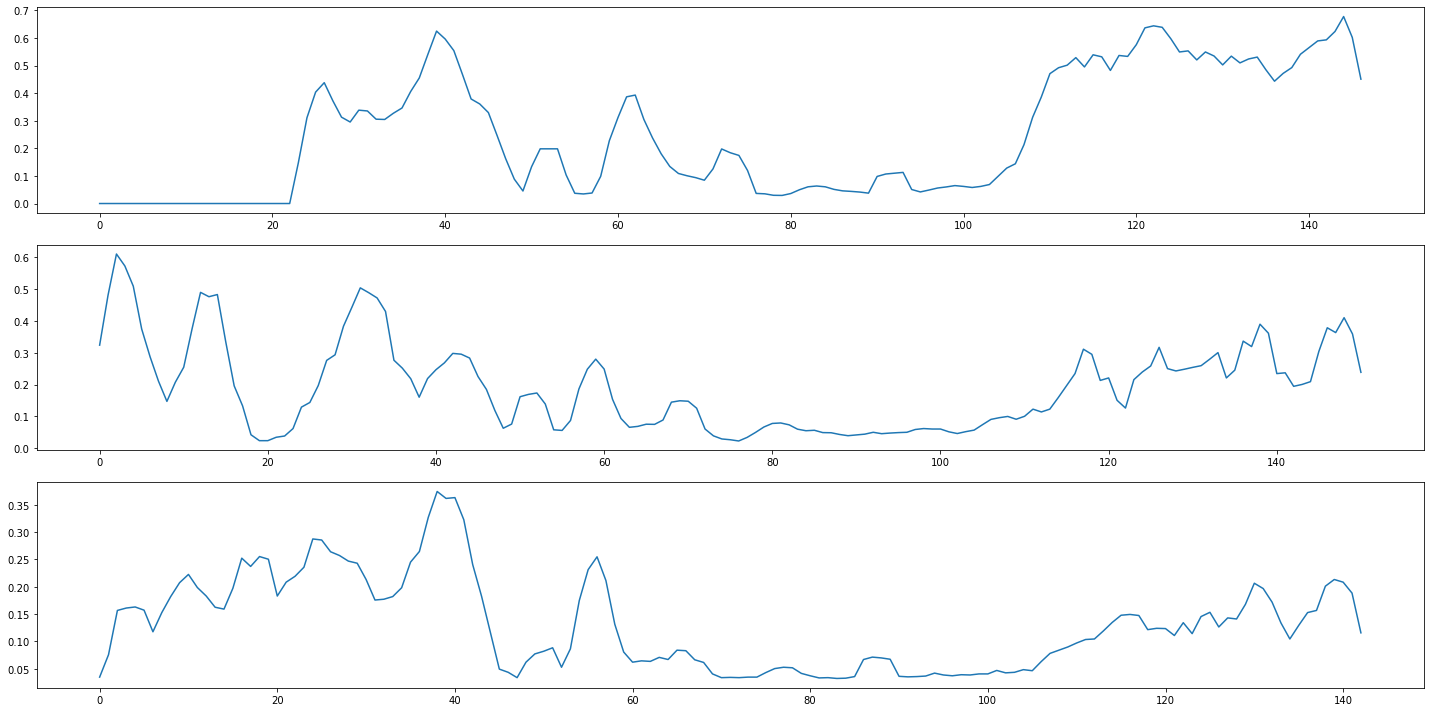

In [166]:
fig, axs = plt.subplots(3, figsize=(20,10))
for i in range(len(sad)):
    plt.tight_layout()
    x , sr = librosa.load(os.path.join(path, sad['Audio Path'][i]))
    zero_crossings = librosa.zero_crossings(x)
    zcrs = librosa.feature.zero_crossing_rate(x)
    axs[i].plot(zcrs[0])

### Spectral Centroids

In [170]:
from sklearn.preprocessing import minmax_scale
def normalize(x, axis=0):
    return minmax_scale(x, axis=axis)

C:\Users\preri\AppData\Local\Temp\ipykernel_29164\3102430288.py:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.3476577e-05
  9.4239731e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
C:\Users\preri\AppData\Local\Temp\ipykernel_29164\3102430288.py:5: FutureWarning: Pass y=[-1.6822823e-06 -4.5924708e-06 -2.3459008e-05 ...  2.9002065e-05
  5.7582980e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
C:\Users\preri\AppData\Local\Temp\ipykernel_29164\3102430288.py:5: FutureWarning: Pass y=[-1.2408540e-05 -1.8553740e-06  1.3035472e-06 ... -1.3295649e-05
 -4.2509064e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_

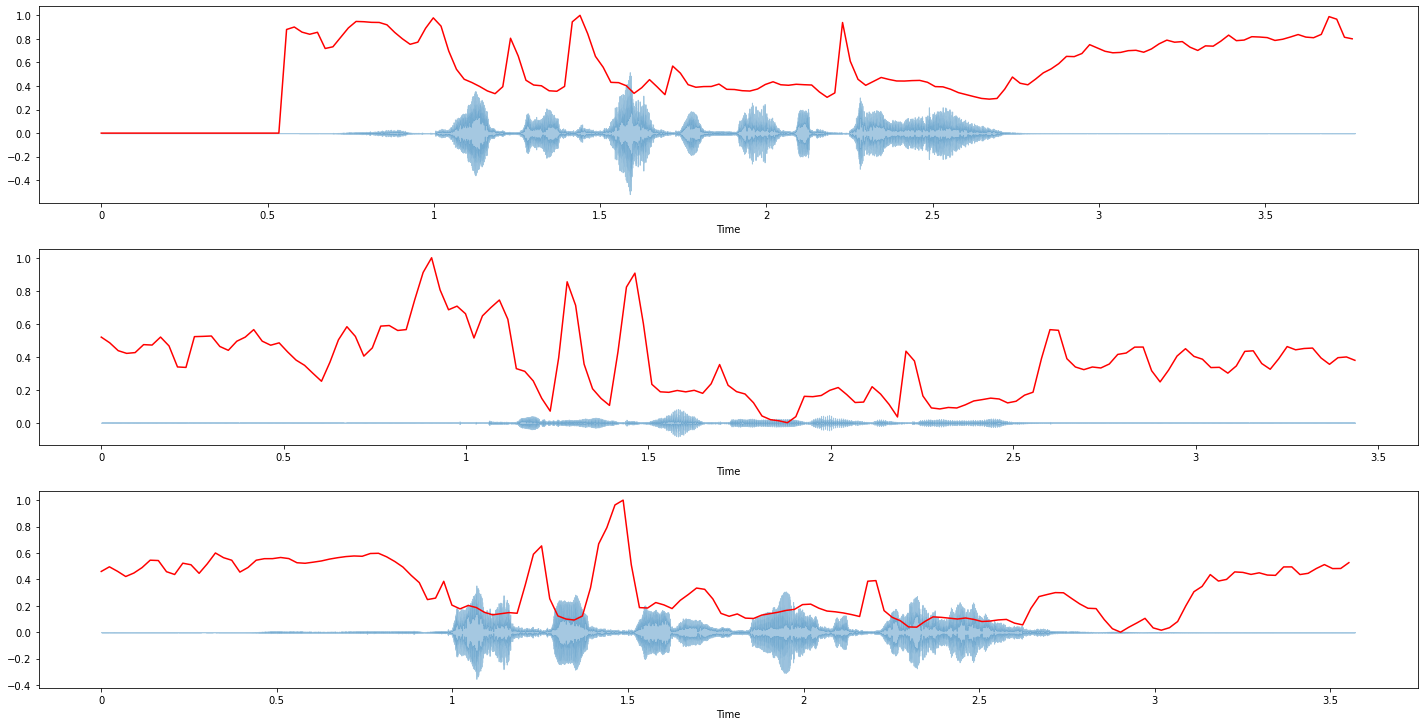

In [172]:
fig, axs = plt.subplots(3, figsize=(20,10))
for i in range(len(happy)):
    plt.tight_layout()
    x , sr = librosa.load(os.path.join(path, happy['Audio Path'][i]))
    spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
    zcrs = librosa.feature.zero_crossing_rate(x)
    frames = range(len(spectral_centroids))
    t = librosa.frames_to_time(frames)
    librosa.display.waveshow(x, sr=sr, alpha=0.4,ax=axs[i])
    axs[i].plot(t, normalize(spectral_centroids), color='r')

C:\Users\preri\AppData\Local\Temp\ipykernel_29164\1016538106.py:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0718893e-06
  2.2987413e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
C:\Users\preri\AppData\Local\Temp\ipykernel_29164\1016538106.py:5: FutureWarning: Pass y=[-2.5182544e-05 -5.3399294e-06 -3.0962995e-06 ...  6.4532185e-10
 -7.2984413e-10  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
C:\Users\preri\AppData\Local\Temp\ipykernel_29164\1016538106.py:5: FutureWarning: Pass y=[ 6.0130307e-05  1.1391429e-04  8.0200291e-05 ... -9.5263014e-05
 -1.0773415e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_

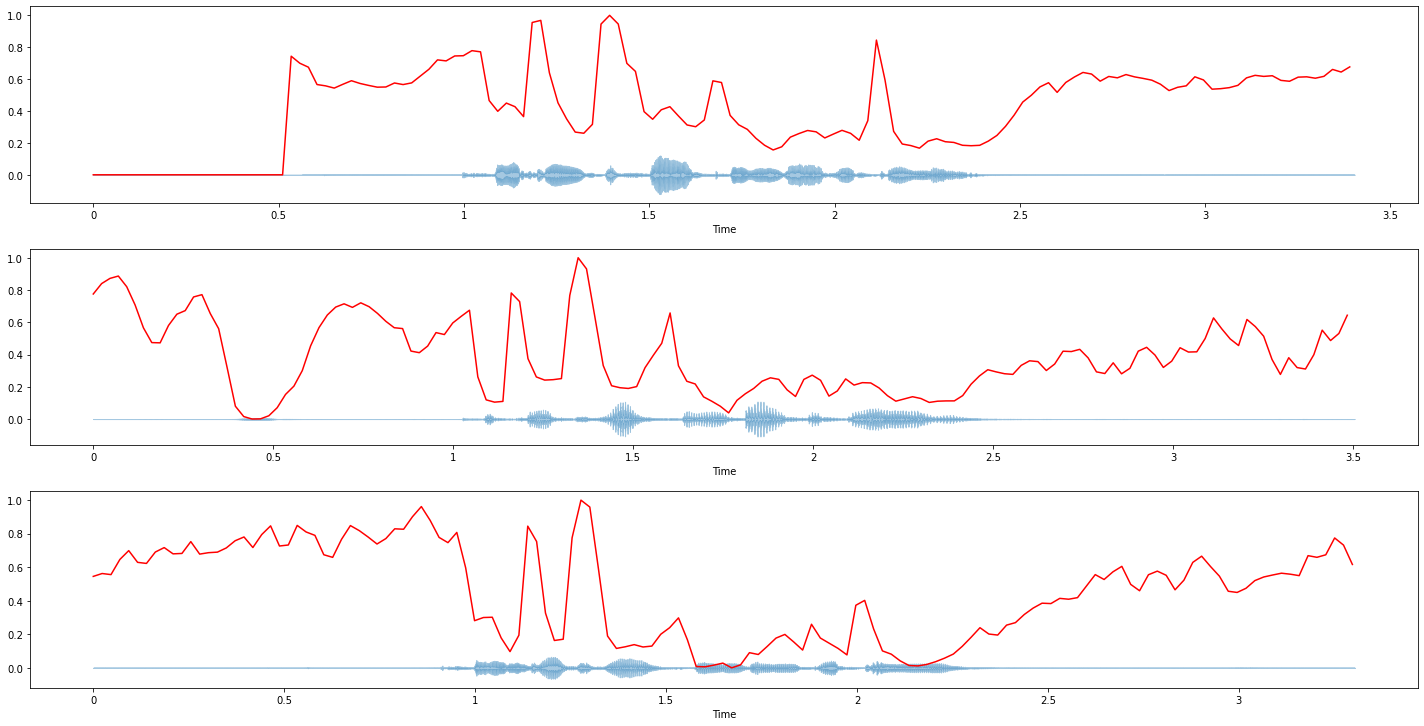

In [173]:
fig, axs = plt.subplots(3, figsize=(20,10))
for i in range(len(sad)):
    plt.tight_layout()
    x , sr = librosa.load(os.path.join(path, sad['Audio Path'][i]))
    spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
    zcrs = librosa.feature.zero_crossing_rate(x)
    frames = range(len(spectral_centroids))
    t = librosa.frames_to_time(frames)
    librosa.display.waveshow(x, sr=sr, alpha=0.4,ax=axs[i])
    axs[i].plot(t, normalize(spectral_centroids), color='r')

### Spectral Bandwidth

C:\Users\preri\AppData\Local\Temp\ipykernel_29164\1965520127.py:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.3476577e-05
  9.4239731e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=sr, roll_percent=0.01)[0]
C:\Users\preri\AppData\Local\Temp\ipykernel_29164\1965520127.py:5: FutureWarning: Pass y=[-1.6822823e-06 -4.5924708e-06 -2.3459008e-05 ...  2.9002065e-05
  5.7582980e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=sr, roll_percent=0.01)[0]
C:\Users\preri\AppData\Local\Temp\ipykernel_29164\1965520127.py:5: FutureWarning: Pass y=[-1.2408540e-05 -1.8553740e-06  1.3035472e-06 ... -1.3295649e-05
 -4.2509064e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments wil

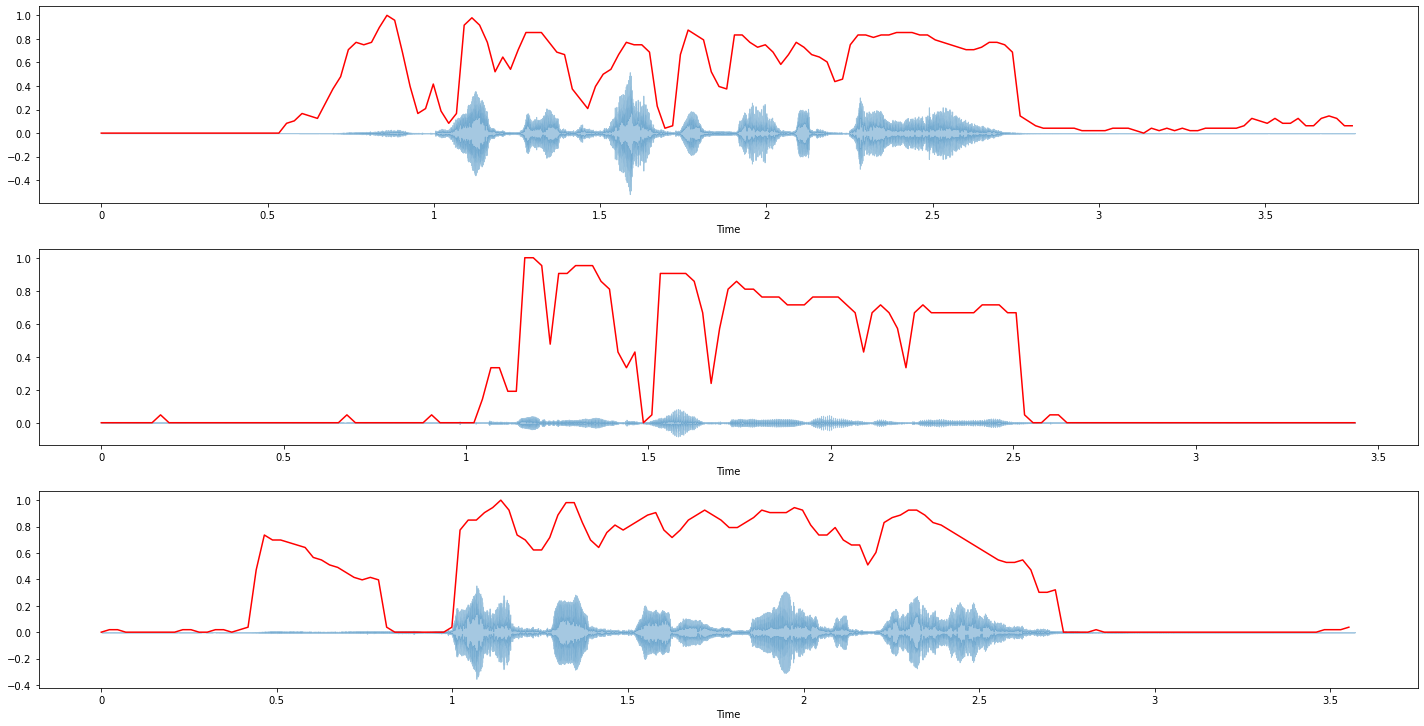

In [177]:
fig, axs = plt.subplots(3, figsize=(20,10))
for i in range(len(happy)):
    plt.tight_layout()
    x , sr = librosa.load(os.path.join(path, happy['Audio Path'][i]))
    spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=sr, roll_percent=0.01)[0]
    frames = range(len(spectral_rolloff))
    t = librosa.frames_to_time(frames)
    librosa.display.waveshow(x, sr=sr, alpha=0.4, ax=axs[i])
    axs[i].plot(t, normalize(spectral_rolloff), color='r')

C:\Users\preri\AppData\Local\Temp\ipykernel_29164\3840570046.py:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0718893e-06
  2.2987413e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=sr, roll_percent=0.01)[0]
C:\Users\preri\AppData\Local\Temp\ipykernel_29164\3840570046.py:5: FutureWarning: Pass y=[-2.5182544e-05 -5.3399294e-06 -3.0962995e-06 ...  6.4532185e-10
 -7.2984413e-10  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=sr, roll_percent=0.01)[0]
C:\Users\preri\AppData\Local\Temp\ipykernel_29164\3840570046.py:5: FutureWarning: Pass y=[ 6.0130307e-05  1.1391429e-04  8.0200291e-05 ... -9.5263014e-05
 -1.0773415e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments wil

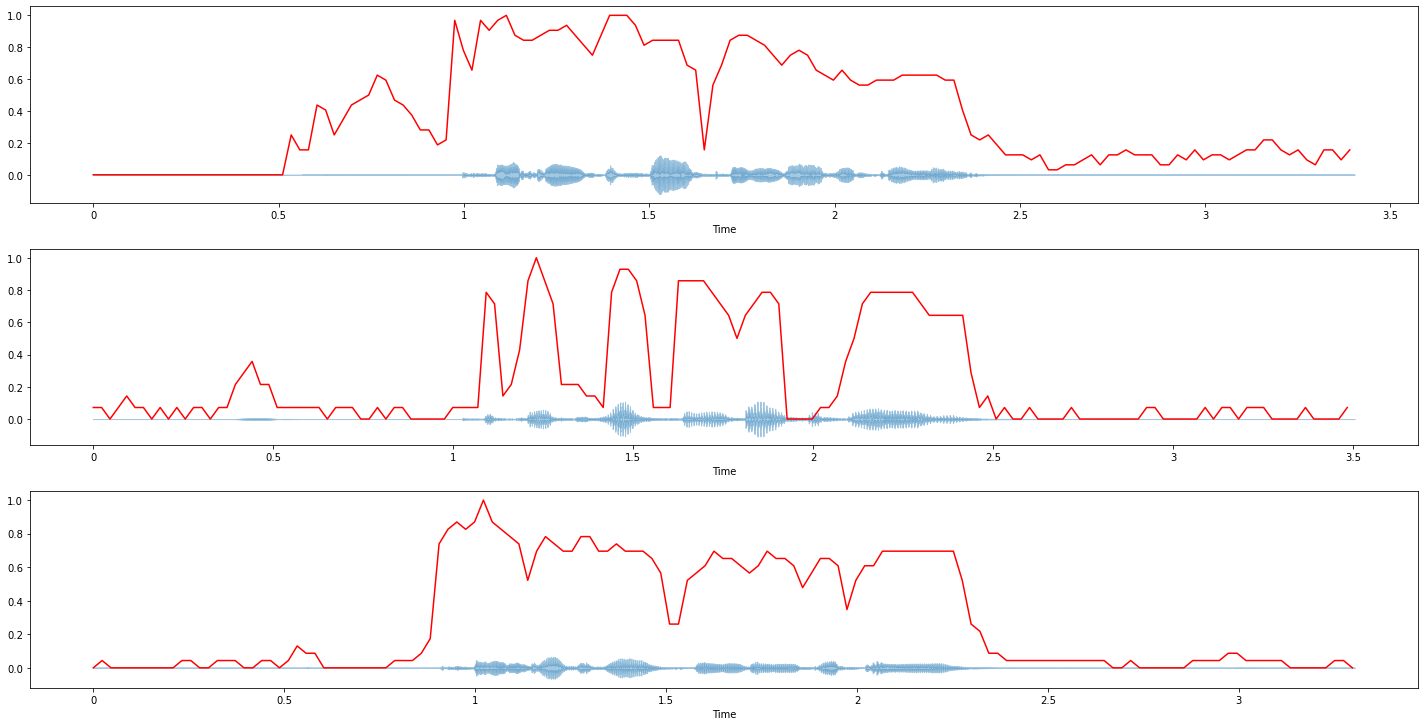

In [178]:
fig, axs = plt.subplots(3, figsize=(20,10))
for i in range(len(sad)):
    plt.tight_layout()
    x , sr = librosa.load(os.path.join(path, sad['Audio Path'][i]))
    spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=sr, roll_percent=0.01)[0]
    frames = range(len(spectral_rolloff))
    t = librosa.frames_to_time(frames)
    librosa.display.waveshow(x, sr=sr, alpha=0.4, ax=axs[i])
    axs[i].plot(t, normalize(spectral_rolloff), color='r')

### MFCC

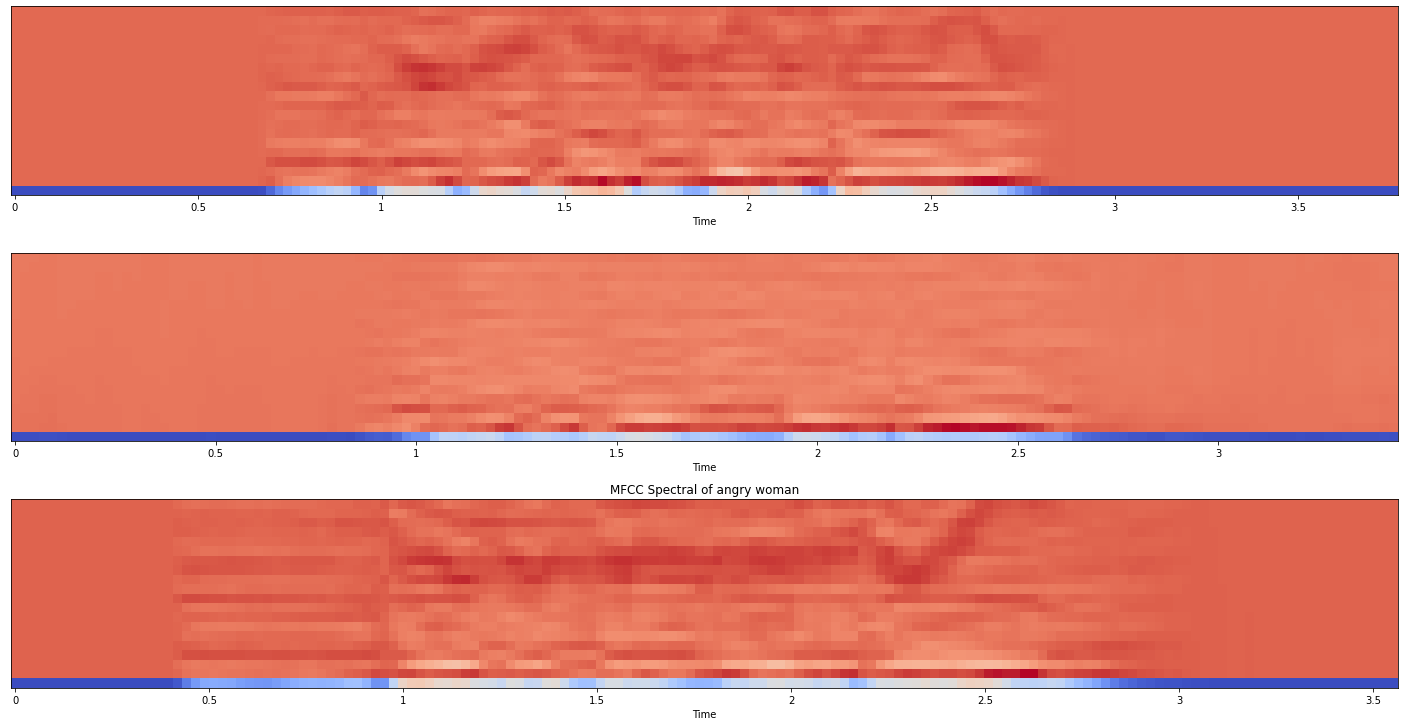

In [180]:
fig, axs = plt.subplots(3, figsize=(20,10))
for i in range(len(happy)):
    plt.tight_layout()
    x , sr = librosa.load(os.path.join(path, happy['Audio Path'][i]))
    plt.title('MFCC Spectral of angry woman')
    mfccs = librosa.feature.mfcc(y=x, sr=sr)
    librosa.display.specshow(mfccs, sr=sr, x_axis='time', ax=axs[i])

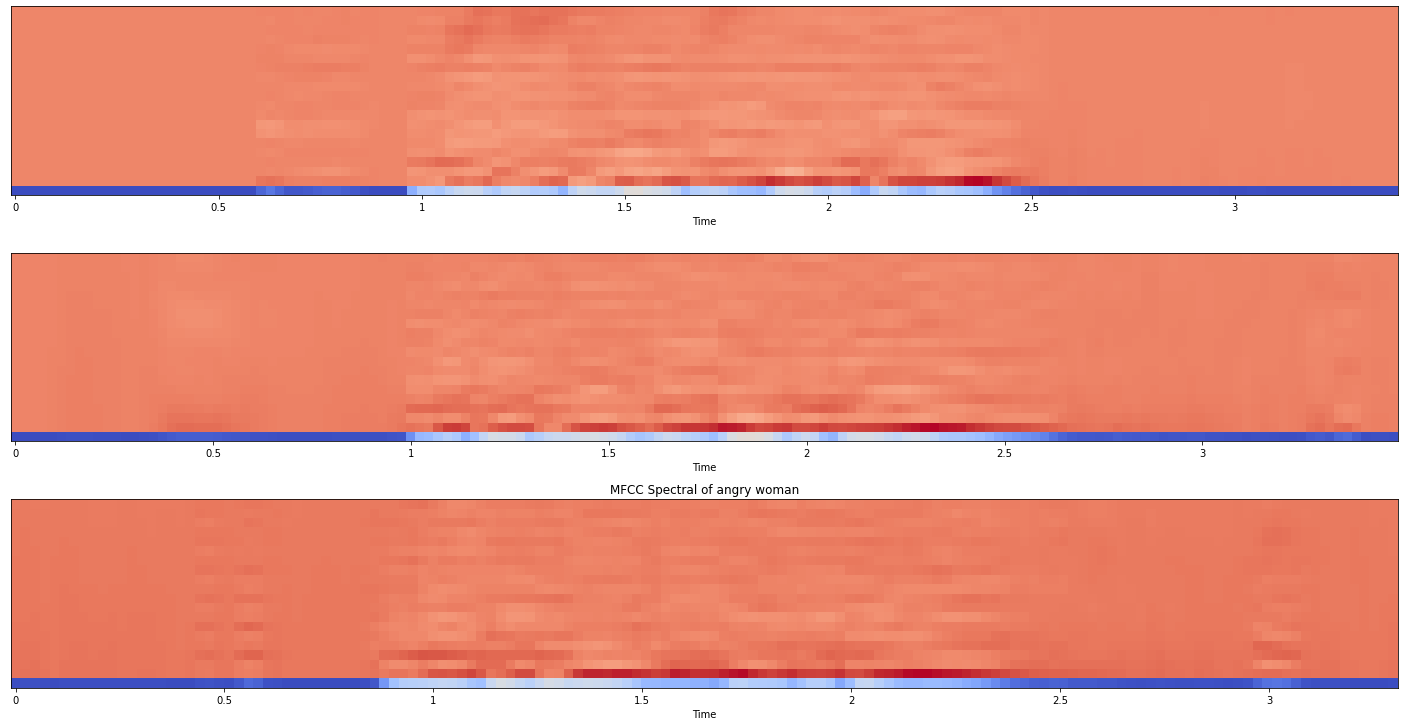

In [181]:
fig, axs = plt.subplots(3, figsize=(20,10))
for i in range(len(sad)):
    plt.tight_layout()
    x , sr = librosa.load(os.path.join(path, sad['Audio Path'][i]))
    plt.title('MFCC Spectral of angry woman')
    mfccs = librosa.feature.mfcc(y=x, sr=sr)
    librosa.display.specshow(mfccs, sr=sr, x_axis='time', ax=axs[i])

Words or features in happy emotion are much more evident then sad emotion.

## Task 2
Extract the MFCC features with 40 components from those 500 audios and build simple logistic regression. Comment on the model output performance. Try to adjust MFCC components)

In [246]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [242]:
def Data(audio_files, function):
    data = []
    for i in range(len(audio_files)):
        x , sr = librosa.load(os.path.join(path, audio_files['Audio Path'][i]))
        if function == 'mfcc':
            data.append(np.mean(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=40).T,axis=0))
        else:
            data.append(np.mean(librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128).T,axis=0))
        
    data = pd.DataFrame(data)
    data['class'] = audio_files['Emotion']
    X = data.iloc[:,:-1]
    X = normalize(X)
    y = data.iloc[:,-1]
    return X,y

In [243]:
X, y = Data(audio_files, 'mfcc')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model_mfcc = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = model_mfcc.predict(X_test)

In [247]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7874015748031497
[[43 17]
 [10 57]]
              precision    recall  f1-score   support

       happy       0.81      0.72      0.76        60
         sad       0.77      0.85      0.81        67

    accuracy                           0.79       127
   macro avg       0.79      0.78      0.78       127
weighted avg       0.79      0.79      0.79       127



> n_mfcc = 20; Accuracy = 0.76 <br>
n_mfcc = 40; Accuracy = 0.79<br>
n_mfcc = 40; Accuracy = 0.76

## Task 3
Extract the mel spectrogram features with 128 mel bands from those 500 audios and build simple logistic regression. Comment on the model output performance.

In [248]:
X, y = Data(audio_files, 'melspectrogram')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model_melspec = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = model_melspec.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7244094488188977
[[32 28]
 [ 7 60]]
              precision    recall  f1-score   support

       happy       0.82      0.53      0.65        60
         sad       0.68      0.90      0.77        67

    accuracy                           0.72       127
   macro avg       0.75      0.71      0.71       127
weighted avg       0.75      0.72      0.71       127



## Task 4
Compare model results of MFCC and Mel Spectrogram

Comparing models for m_fcc = 40 and n_mels = 128 <br>
Model trained on MFCC performed better than the model trained on Mel Spectrogram. MFCC model has lower misclassification rate (0.21) as compared to Mel Spectrogram model (0.28)